In [1]:
import pandas as pd
import numpy as np


### Import data: (Features = Independent Variables, Lables = Dependent)

In [2]:
#Food security metrics
fies_A = pd.read_csv("/home/arnold/Desktop/temp_file/ray_plots/regr/fies_r.csv")
fies_A = fies_A.iloc[:,1:]
print(fies_A.head())

fies_B = pd.read_csv("/home/arnold/Desktop/temp_file/ray_plots/regr/FIES_se_B_r.csv")
fies_B = fies_B.iloc[:,1:]
fies_B = fies_B.replace(np.nan,0)  #replace nan with zero
print(fies_B.head())


   Worried  Healthy  FewFoods  Skipped  AteLess  RanOut  Hungry  WholeDay
0        1        1         1        1        1       1       1         1
1        1        1         1        1        1       1       2         2
2        1        1         1        1        1       1       2         1
3        1        1         1        1        1       1       2         2
4        1        1         1        1        1       1       2         1
   Chronic  Occasional  Break-even  Food surplus
0      0.0         2.0         0.0           0.0
1      0.0         2.0         0.0           0.0
2      0.0         2.0         0.0           0.0
3      0.0         2.0         0.0           0.0
4      0.0         2.0         0.0           0.0


In [3]:

#A: Demographics
## Age
A_Age = pd.read_csv("/home/arnold/Desktop/temp_file/ray_plots/regr/A_Age_r.csv")
A_Age = A_Age.iloc[:,1:]

## Gender
A_gender = pd.read_csv("/home/arnold/Desktop/temp_file/ray_plots/regr/A_gender_r.csv")
A_gender = A_gender.iloc[:,1:]

## HH size
A_HH_size = pd.read_csv("/home/arnold/Desktop/temp_file/ray_plots/regr/A_HH_size_r.csv")
A_HH_size = A_HH_size.iloc[:,1:]

## years of schooling
A_Schooling_Years = pd.read_csv("/home/arnold/Desktop/temp_file/ray_plots/regr/A_Schooling_Years_r.csv")
A_Schooling_Years = A_Schooling_Years.iloc[:,1:]


#=====
#B: Sorghum FarmSize
B_S_FarmSize = pd.read_csv("/home/arnold/Desktop/temp_file/ray_plots/regr/B_S_FarmSize_r.csv")
B_S_FarmSize = B_S_FarmSize.iloc[:,1:]


#=====
#C: Contract
C_contracted = pd.read_csv("/home/arnold/Desktop/temp_file/ray_plots/regr/C_contracted_r.csv")
C_contracted = C_contracted.iloc[:,1:]

# M_Participation
C_M_participation = pd.read_csv("/home/arnold/Desktop/temp_file/ray_plots/regr/C_M_participation_r.csv")
C_M_participation = C_M_participation.iloc[:,1:]


# D: coop_member_r
D_coop_member = pd.read_csv("/home/arnold/Desktop/temp_file/ray_plots/regr/D_coop_member_r.csv")
D_coop_member = D_coop_member.iloc[:,1:]

# E: E_sorghum_sold_r
E_sorghum_sold = pd.read_csv("/home/arnold/Desktop/temp_file/ray_plots/regr/E_sorghum_sold_r.csv")
E_sorghum_sold = E_sorghum_sold.iloc[:,1:]



In [4]:
#Combine dataframes
features = pd.concat([A_Age, 
                    A_gender, 
                    A_HH_size, 
                    A_Schooling_Years, 
                    B_S_FarmSize, 
                    C_contracted, 
                    C_M_participation, 
                    D_coop_member, 
                    E_sorghum_sold], 
                   axis=1, 
                   join="inner")
features.head()



,Age,Gender,Household_Size,Schooling_Years,S_FarmSize,Contract,O_market_participation,coop_membership,sorghum_sold
0,3,2,2,8,3,2,1,2,1
1,3,1,1,8,6,2,2,2,2
2,3,2,1,8,5,2,2,2,2
3,3,1,1,6,1,2,2,2,2
4,2,2,1,6,3,2,2,2,2


### Merge Food Security categories (# "Chronic" and "Occasional" to Zero, "Break-even" and "Food surplus" to One)

In [5]:
# Covert labels to binary
# Chronic and Occasional to Zero, 
# "Break-even" and "Food surplus" to 1
# Slide the categories columns into one array/collumn

# Merge "Chronic" and "occasional"
fies_B['FIES_status_0']= fies_B[["Chronic", "Occasional"]].sum(axis=1)

# Merge "Break-even" and "Food surplus"
fies_B['FIES_status_1']= fies_B[["Break-even", "Food surplus"]].sum(axis=1)
fies_B

#Replace 1 and 2 with zero 
fies_B['FIES_status_0'] = fies_B['FIES_status_0'].replace(1,0)  #replace nan with zero
fies_B['FIES_status_0'] = fies_B['FIES_status_0'].replace(2,0)  #replace nan with zero

#Replace 3 and 4 with zero 
fies_B['FIES_status_1'] = fies_B['FIES_status_1'].replace(3,1)  #replace nan with zero
fies_B['FIES_status_1'] = fies_B['FIES_status_1'].replace(4,1)  #replace nan with zero


# Merge  "Chronic", "occasional", "Break-even" and "Food surplus" into one array with zeros and ones, 
# and overwrite the fies status column

fies_B['FIES_status']= fies_B[['FIES_status_0', 'FIES_status_1']].sum(axis=1)

fies_B = fies_B.iloc[:,-1:]

label = fies_B

## 1. Test for Multicollinearity (Pearson's Correlation)

In [6]:
df_all = pd.concat([label,
                    features], 
                   axis=1, 
                   join="inner")
df_all.head()

,FIES_status,Age,Gender,Household_Size,Schooling_Years,S_FarmSize,Contract,O_market_participation,coop_membership,sorghum_sold
0,0.0,3,2,2,8,3,2,1,2,1
1,0.0,3,1,1,8,6,2,2,2,2
2,0.0,3,2,1,8,5,2,2,2,2
3,0.0,3,1,1,6,1,2,2,2,2
4,0.0,2,2,1,6,3,2,2,2,2


In [7]:
# storing into the excel file
#df_all.to_excel("output_data.xlsx")


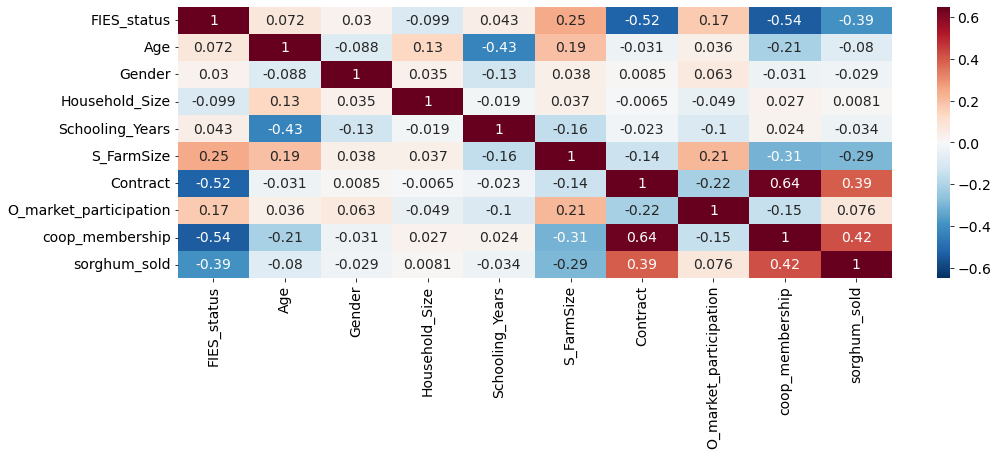

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

correlation = df_all.corr()
#Export correlation matrix
#correlation.to_csv("./correlation_.csv", sep=',', encoding='utf-8')

plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(16, 5))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-0.65, vmax=0.65, cmap="RdBu_r")
#Export heatmap
#plt.savefig('Correlation.png',bbox_inches='tight', format='png', dpi=300, edgecolor='none', facecolor=heatmap.get_facecolor())


#### >> Pearsons Correlation shows "Contract", "Coop-membership" & "Sorghum sold" exert high impact on Food Security (They show poor correlation)

## 2. Pearsons Chi-Square Test
### Method 1

In [9]:
import scipy.stats as stats

# Data to be used for chi-square calculation looks like 

observed = features

observed.head()  #Prints the first five lines of the table


,Age,Gender,Household_Size,Schooling_Years,S_FarmSize,Contract,O_market_participation,coop_membership,sorghum_sold
0,3,2,2,8,3,2,1,2,1
1,3,1,1,8,6,2,2,2,2
2,3,2,1,8,5,2,2,2,2
3,3,1,1,6,1,2,2,2,2
4,2,2,1,6,3,2,2,2,2


##### Tests whether respondents (0-207) vary based on the demographic/Vertical/Horizontal factors (Age, Gender,...Sorghum sold)
#### Hypotheses
    ##### H0: (null hypothesis) The two variables are independent.
    ##### H1: (alternative hypothesis) The two variables are not independent.

In [10]:

#Perform the Chi-Square Test of Independence 

stat, p, dof, expected = stats.chi2_contingency(observed= observed)

# stat is the chi-square statistic
# p is the p-value
# dof is the degree of freedom
# The expected values for each cell in the contingency table

print("Chi-square statistic = ",stat)
print("P-value = ", p)
print("Degree of freedom = ", dof)
print("Expected values = \n", expected)


Chi-square statistic =  554.7625332058597
P-value =  1.0
Degree of freedom =  1648
Expected values = 
 [[4.02838137 1.67627494 1.27184035 ... 1.36762749 1.61773836 1.60709534]
 [4.53192905 1.88580931 1.4308204  ... 1.53858093 1.81995565 1.80798226]
 [4.53192905 1.88580931 1.4308204  ... 1.53858093 1.81995565 1.80798226]
 ...
 [2.68558758 1.11751663 0.84789357 ... 0.91175166 1.07849224 1.0713969 ]
 [3.02128603 1.25720621 0.95388027 ... 1.02572062 1.21330377 1.20532151]
 [4.53192905 1.88580931 1.4308204  ... 1.53858093 1.81995565 1.80798226]]


#
#### Since the p-value (1.0) of the test is not less than 0.05, we fail to reject the null hypothesis. This means we do not have sufficient evidence to say that there is an association between Respondents and Demographic/Vertical/Horizontal factors.

#### In other words, Respondents and Demographic/Vertical/Horizontal factors are independent.
#

### Method 2

In [11]:
df_all.head()  #complete table (including features (independent variables) and label (fies status))

,FIES_status,Age,Gender,Household_Size,Schooling_Years,S_FarmSize,Contract,O_market_participation,coop_membership,sorghum_sold
0,0.0,3,2,2,8,3,2,1,2,1
1,0.0,3,1,1,8,6,2,2,2,2
2,0.0,3,2,1,8,5,2,2,2,2
3,0.0,3,1,1,6,1,2,2,2,2
4,0.0,2,2,1,6,3,2,2,2,2


#### (i) Age vs FIES status


In [12]:
temp=df_all.groupby(['FIES_status', 'Age'])['Age'].agg(['count']).reset_index()

a_v_f = pd.pivot_table(temp,values='count',index='Age',columns='FIES_status', fill_value=0)

a_v_f

FIES_status,0.0,1.0
Age,,
1,0,1
2,10,26
3,27,32
4,15,33
5,16,47


In [13]:
#Perform the Chi-Square Test of Independence 

stat, p, dof, expected = stats.chi2_contingency(observed= a_v_f)

print(">> Age vs FIES status")
print("Chi-square statistic = ",stat)
print("P-value = ", p)
print("Degree of freedom = ", dof)
print("Expected values = \n", expected)


>> Age vs FIES status
Chi-square statistic =  7.0109604223045165
P-value =  0.1353101496643227
Degree of freedom =  4
Expected values = 
 [[ 0.32850242  0.67149758]
 [11.82608696 24.17391304]
 [19.38164251 39.61835749]
 [15.76811594 32.23188406]
 [20.69565217 42.30434783]]


#### (ii) Gender vs FIES status


In [14]:
temp=df_all.groupby(['FIES_status', 'Gender'])['Gender'].agg(['count']).reset_index()

g_v_f = pd.pivot_table(temp,values='count',index='Gender',columns='FIES_status', fill_value=0)

g_v_f

FIES_status,0.0,1.0
Gender,,
1,34,65
2,34,74


In [15]:
#Perform the Chi-Square Test of Independence 

stat, p, dof, expected = stats.chi2_contingency(observed= g_v_f)

print(">> Gender vs FIES status")
print("Chi-square statistic = ",stat)
print("P-value = ", p)
print("Degree of freedom = ", dof)
print("Expected values = \n", expected)


>> Gender vs FIES status
Chi-square statistic =  0.08399196418266477
P-value =  0.7719587881925758
Degree of freedom =  1
Expected values = 
 [[32.52173913 66.47826087]
 [35.47826087 72.52173913]]


#### (iii) HouseholdSize vs FIES status


In [16]:
temp=df_all.groupby(['FIES_status', 'Household_Size'])['Household_Size'].agg(['count']).reset_index()

hh_v_f = pd.pivot_table(temp,values='count',index='Household_Size',columns='FIES_status', fill_value=0)

hh_v_f

FIES_status,0.0,1.0
Household_Size,,
1,54,121
2,14,18


In [17]:
#Perform the Chi-Square Test of Independence 

stat, p, dof, expected = stats.chi2_contingency(observed= hh_v_f)

print(">> Household_Size vs FIES status")
print("Chi-square statistic = ",stat)
print("P-value = ", p)
print("Degree of freedom = ", dof)
print("Expected values = \n", expected)


>> Household_Size vs FIES status
Chi-square statistic =  1.496022114556254
P-value =  0.22128444047212384
Degree of freedom =  1
Expected values = 
 [[ 57.48792271 117.51207729]
 [ 10.51207729  21.48792271]]


#### (iv) Schooling_Years vs FIES status


In [18]:
temp=df_all.groupby(['FIES_status', 'Schooling_Years'])['Schooling_Years'].agg(['count']).reset_index()

sy_v_f = pd.pivot_table(temp,values='count',index='Schooling_Years',columns='FIES_status', fill_value=0)

sy_v_f

FIES_status,0.0,1.0
Schooling_Years,,
1,2,8
2,2,4
3,2,6
4,26,26
5,4,17
6,17,41
7,3,16
8,12,21


In [19]:
#Perform the Chi-Square Test of Independence 

stat, p, dof, expected = stats.chi2_contingency(observed= sy_v_f)

print(">> Schooling_Years vs FIES status")
print("Chi-square statistic = ",stat)
print("P-value = ", p)
print("Degree of freedom = ", dof)
print("Expected values = \n", expected)


>> Schooling_Years vs FIES status
Chi-square statistic =  12.740851731176981
P-value =  0.07867993174332491
Degree of freedom =  7
Expected values = 
 [[ 3.28502415  6.71497585]
 [ 1.97101449  4.02898551]
 [ 2.62801932  5.37198068]
 [17.0821256  34.9178744 ]
 [ 6.89855072 14.10144928]
 [19.0531401  38.9468599 ]
 [ 6.24154589 12.75845411]
 [10.84057971 22.15942029]]


#### (v) S_FarmSize vs FIES status


In [20]:
temp=df_all.groupby(['FIES_status', 'S_FarmSize'])['S_FarmSize'].agg(['count']).reset_index()

sfs_v_f = pd.pivot_table(temp,values='count',index='S_FarmSize',columns='FIES_status', fill_value=0)

sfs_v_f

FIES_status,0.0,1.0
S_FarmSize,,
1,5,8
2,18,13
3,9,9
4,12,30
5,4,8
6,20,69
8,0,2


In [21]:
#Perform the Chi-Square Test of Independence 

stat, p, dof, expected = stats.chi2_contingency(observed= sfs_v_f)

print(">> S_FarmSize vs FIES status")
print("Chi-square statistic = ",stat)
print("P-value = ", p)
print("Degree of freedom = ", dof)
print("Expected values = \n", expected)


>> S_FarmSize vs FIES status
Chi-square statistic =  17.19405594487957
P-value =  0.00859590521539936
Degree of freedom =  6
Expected values = 
 [[ 4.2705314   8.7294686 ]
 [10.18357488 20.81642512]
 [ 5.91304348 12.08695652]
 [13.79710145 28.20289855]
 [ 3.94202899  8.05797101]
 [29.23671498 59.76328502]
 [ 0.65700483  1.34299517]]


#### (vi) Contract vs FIES status


In [22]:
temp=df_all.groupby(['FIES_status', 'Contract'])['Contract'].agg(['count']).reset_index()

c_v_f = pd.pivot_table(temp,values='count',index='Contract',columns='FIES_status', fill_value=0)

c_v_f

FIES_status,0.0,1.0
Contract,,
1,4,85
2,64,54


In [23]:
#Perform the Chi-Square Test of Independence 

stat, p, dof, expected = stats.chi2_contingency(observed= c_v_f)

print(">> Contract vs FIES status")
print("Chi-square statistic = ",stat)
print("P-value = ", p)
print("Degree of freedom = ", dof)
print("Expected values = \n", expected)


>> Contract vs FIES status
Chi-square statistic =  54.676330435477986
P-value =  1.421075568718685e-13
Degree of freedom =  1
Expected values = 
 [[29.23671498 59.76328502]
 [38.76328502 79.23671498]]


#### (vii) O_market_participation vs FIES status


In [24]:
temp=df_all.groupby(['FIES_status', 'O_market_participation'])['O_market_participation'].agg(['count']).reset_index()

omp_v_f = pd.pivot_table(temp,values='count',index='O_market_participation',columns='FIES_status', fill_value=0)

omp_v_f

FIES_status,0.0,1.0
O_market_participation,,
0,25,14
1,14,65
2,29,60


In [25]:
#Perform the Chi-Square Test of Independence 

stat, p, dof, expected = stats.chi2_contingency(observed= omp_v_f)

print(">> O_market_participation vs FIES status")
print("Chi-square statistic = ",stat)
print("P-value = ", p)
print("Degree of freedom = ", dof)
print("Expected values = \n", expected)


>> O_market_participation vs FIES status
Chi-square statistic =  25.46789898732408
P-value =  2.9492799750387896e-06
Degree of freedom =  2
Expected values = 
 [[12.8115942  26.1884058 ]
 [25.95169082 53.04830918]
 [29.23671498 59.76328502]]


#### (viii) coop_membership vs FIES status


In [26]:
temp=df_all.groupby(['FIES_status', 'coop_membership'])['coop_membership'].agg(['count']).reset_index()

cm_v_f = pd.pivot_table(temp,values='count',index='coop_membership',columns='FIES_status', fill_value=0)

cm_v_f

FIES_status,0.0,1.0
coop_membership,,
1,10,100
2,58,39


In [27]:
#Perform the Chi-Square Test of Independence 

stat, p, dof, expected = stats.chi2_contingency(observed= cm_v_f)

print(">> coop_membership vs FIES status")
print("Chi-square statistic = ",stat)
print("P-value = ", p)
print("Degree of freedom = ", dof)
print("Expected values = \n", expected)


>> coop_membership vs FIES status
Chi-square statistic =  57.79610217967089
P-value =  2.907452778445054e-14
Degree of freedom =  1
Expected values = 
 [[36.1352657 73.8647343]
 [31.8647343 65.1352657]]


#### (viii) sorghum_sold vs FIES status


In [28]:
temp=df_all.groupby(['FIES_status', 'sorghum_sold'])['sorghum_sold'].agg(['count']).reset_index()

ss_v_f = pd.pivot_table(temp,values='count',index='sorghum_sold',columns='FIES_status', fill_value=0)

ss_v_f

FIES_status,0.0,1.0
sorghum_sold,,
0,0,1
1,17,94
2,51,43
3,0,1


In [29]:
#Perform the Chi-Square Test of Independence 

stat, p, dof, expected = stats.chi2_contingency(observed= ss_v_f)

print(">> sorghum_sold vs FIES status")
print("Chi-square statistic = ",stat)
print("P-value = ", p)
print("Degree of freedom = ", dof)
print("Expected values = \n", expected)


>> sorghum_sold vs FIES status
Chi-square statistic =  35.974900298277774
P-value =  7.58043914797869e-08
Degree of freedom =  3
Expected values = 
 [[ 0.32850242  0.67149758]
 [36.46376812 74.53623188]
 [30.87922705 63.12077295]
 [ 0.32850242  0.67149758]]


## 3. Recursive feature elimmination

##### Transform feature data to between 0 and 1 (Normalize)

In [30]:
from sklearn import preprocessing

# Feature data
X = df_all[[i for i in df_all if i != 'FIES_status']]

scaler = preprocessing.MinMaxScaler()
features = scaler.fit_transform(X)

features = pd.DataFrame(features, columns=X.columns)


#### Summary statistics

In [31]:
print(features.describe())


              Age      Gender  Household_Size  Schooling_Years  S_FarmSize  \
count  207.000000  207.000000      207.000000       207.000000  207.000000   
mean     0.664251    0.521739        0.154589         0.619048    0.483092   
std      0.275764    0.500738        0.362389         0.264467    0.249598   
min      0.000000    0.000000        0.000000         0.000000    0.000000   
25%      0.500000    0.000000        0.000000         0.428571    0.285714   
50%      0.750000    1.000000        0.000000         0.714286    0.428571   
75%      1.000000    1.000000        0.000000         0.785714    0.714286   
max      1.000000    1.000000        1.000000         1.000000    1.000000   

         Contract  O_market_participation  coop_membership  sorghum_sold  
count  207.000000              207.000000       207.000000    207.000000  
mean     0.570048                0.620773         0.468599      0.486312  
std      0.496269                0.375077         0.500223      0.172864

#### Use Recursive Feature Elimination (RFE) to identify relevant features 

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


df_vars = df_all.columns.values.tolist()

y = df_all[['FIES_status']]
X = features

# Transform features & labels into numpy arrays
X = np.array(X)
y = np.array(y)

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=9, step=1)
rfe = rfe.fit(X, y.ravel())
print(rfe.support_)
print(rfe.ranking_)


[ True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1]


#### >> RFE shows that all the features in our dataset are relevant for modeling 

## 4. Probit regression

#### Use the statsmodels function to fit our Probit regression with our response variable (FIES_status) and predictor matrix (features)

In [33]:
#Implementing the model
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit

X = features
y = df_all[['FIES_status']]

X = sm.add_constant(X, prepend = False)

model = Probit(y, X.astype(float))
probit_model = model.fit()
print(probit_model.summary())


Optimization terminated successfully.
         Current function value: 0.400608
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:            FIES_status   No. Observations:                  207
Model:                         Probit   Df Residuals:                      197
Method:                           MLE   Df Model:                            9
Date:                Sun, 10 Sep 2023   Pseudo R-squ.:                  0.3672
Time:                        21:00:56   Log-Likelihood:                -82.926
converged:                       True   LL-Null:                       -131.05
Covariance Type:            nonrobust   LLR p-value:                 8.972e-17
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Age                        0.0668      0.479      0.140      0.889      -0.871      

/home/arnold/anaconda2/envs/py36/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [39]:
probit_model.coef_

AttributeError: 'ProbitResults' object has no attribute 'coef_'